In [52]:
import matplotlib.pyplot as plt
from subprocess import check_output
import pandas as pd
from io import StringIO

img_path = 'PageLayoutAnalysisICDAR2-0.jpeg'

image = plt.imread(img_path)


In [53]:
# run tesseract
out = StringIO(check_output(['tesseract', img_path, "-", "-l", "eng", "tsv"]).decode('utf-8'))

df = pd.read_table(out, sep='\t')

Estimating resolution as 355


In [21]:
print(df[(df['conf'] == 95 )& (df['width'] > 10) & (df['height'] > 10)])



     level  page_num  block_num  par_num  line_num  word_num  left   top  \
182      5         1          6        1         1         1   962  1340   
586      5         1         40        1         1         1  1861   387   
975      5         1        102        1         1         1  1465  2268   

     width  height  conf text  
182    260     198  95.0       
586    381     409  95.0       
975     52      19  95.0       


In [ ]:
images = df[(df['level'] == 5) & (df['conf'] == 95)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], row['text'], fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor='red', linewidth=2))

plt.title('Words with confidence equal to 95', fontsize=30)

plt.show()


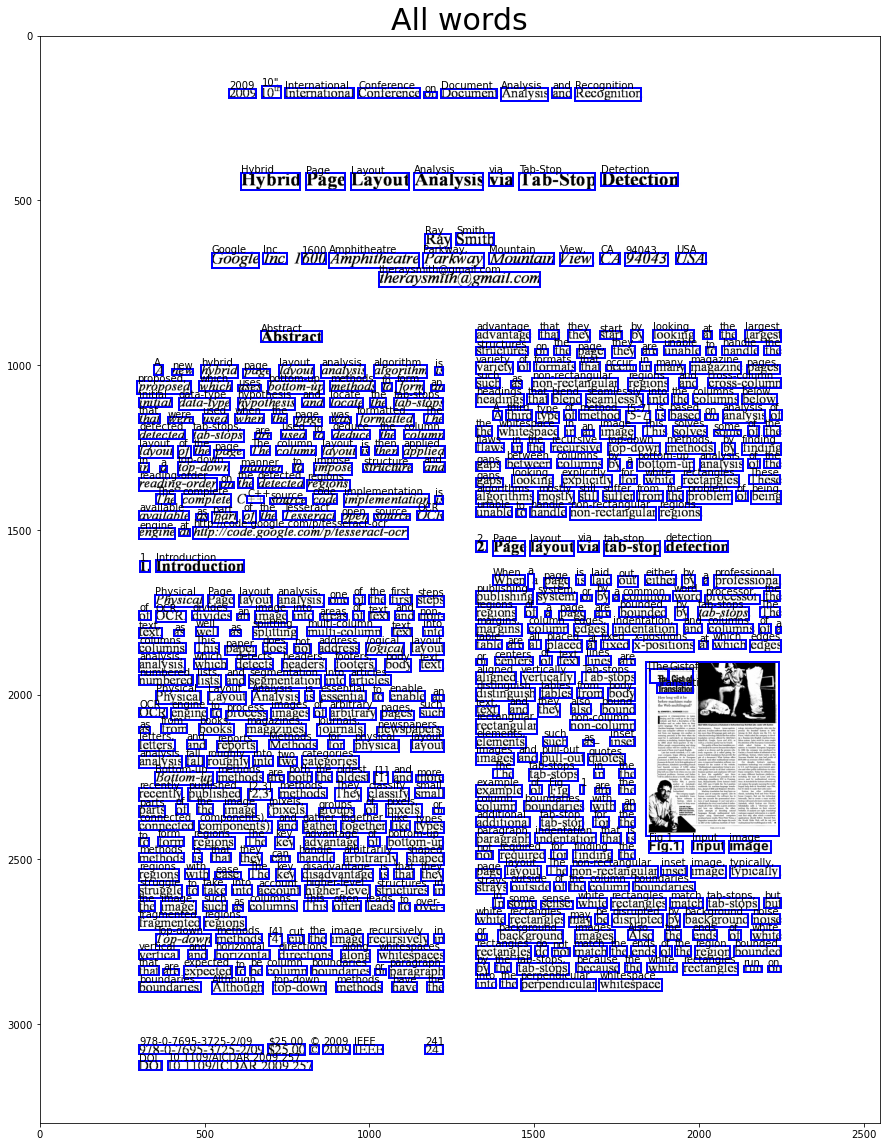

In [56]:
images = df[(df['level'] == 5)]


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)

for _, row in images.iterrows():
    ax.text(row['left'], row['top'], row['text'], fontsize=10)
    ax.add_patch(plt.Rectangle((row['left'], row['top']), row['width'], row['height'], fill=False, edgecolor=('blue' if row['conf'] != 95 else 'red'), linewidth=2))

plt.title('All words', fontsize=30)

plt.show()
